# 서울특별시 공공자전거 이용정보 데이터 분석

* 사용 데이터 : 서울특별시 공공자전거 이용정보(월별)
* 데이터 측정 기간 : 2024년 7월 ~ 12월

# 1. 데이터 불러오기

In [2]:
import pandas as pd

# https://data.seoul.go.kr/dataList/OA-15249/F/1/datasetView.do (따릉이 데이터 받아오기)
data = pd.read_csv("data/서울특별시 공공자전거 이용정보(월별)_24.7-12.csv", encoding="CP949")

data

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...,...,...,...,...,...
619659,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,40대,55,2964.38,23.14,99803.49,1050
619660,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,50대,10,327.38,2.57,11073.52,183
619661,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,60대,1,14.37,0.13,558.26,3
619662,202412,6178,6178. 마스터밸류에이스 지식산업센터,정기권,M,~10대,7,249.95,2.35,10151.09,80


In [59]:
print(data.shape)

(619664, 11)


In [3]:
print(data.columns)

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')


# 2. 데이터 정보 확인하기

In [4]:
data.info()     # 결측치가 너무 많은것 파악(성별 -> 문제 있겠다!) / int로 나와야 하는 데이터가 object로 나오는 경우 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619664 entries, 0 to 619663
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     619664 non-null  int64  
 1   대여소번호    619664 non-null  int64  
 2   대여소명     619664 non-null  object 
 3   대여구분코드   619664 non-null  object 
 4   성별       424280 non-null  object 
 5   연령대코드    619664 non-null  object 
 6   이용건수     619664 non-null  int64  
 7   운동량      619269 non-null  float64
 8   탄소량      619269 non-null  float64
 9   이동거리(M)  619664 non-null  float64
 10  이용시간(분)  619664 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 52.0+ MB


#### 대여일자를 datetime으로 바꾸지 않는 이유
우리가 분석하는 이 데이터는 일자별로 계속 측정이 된 게 아니라 **월별**로 집계된 데이터이기 때문에
이 데이터에서 대여일자는 카테고리라고 할 수 있다.

In [23]:
# 202407
pd.to_datetime(data["대여일자"], format="%Y%m")

0        2024-07-01
1        2024-07-01
2        2024-07-01
3        2024-07-01
4        2024-07-01
            ...    
619659   2024-12-01
619660   2024-12-01
619661   2024-12-01
619662   2024-12-01
619663   2024-12-01
Name: 대여일자, Length: 619664, dtype: datetime64[ns]

#### 데이터 형 변환을 해야 하는 이유
int, float 타입으로 되어 있는 열은 `.describe()`라는 함수를 이용할 때 통계에 이용된다
```
하지만 대여소번호와 같이 고유의 이름을 의미하는 경우에는 통계가 필요없기 때문에 object로 형변환을 해 줄 필요가 있다

In [60]:
data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,NaN,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,NaN,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,NaN,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,NaN,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,NaN,60대,1,35.37,0.31,1333.18,6


In [21]:
data.describe()

,대여일자,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,619664.000000,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000
mean,202409.460550,36.207324,2171.806347,18.868742,8.161182e+04,741.158513
std,1.679584,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371
min,202407.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,202408.000000,4.000000,221.250000,2.010000,8.705685e+03,81.000000
50%,202409.000000,12.000000,773.460000,6.950000,3.007392e+04,274.000000
75%,202411.000000,39.000000,2391.900000,21.140000,9.141029e+04,827.000000
max,202412.000000,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000


## 1) 데이터 형 변환

* 대여일자 : 202507 -> datetime으로 바꾸고 싶다 (위를 참고하여 object로 변경)
* 대여소번호 : 고유의 번호이기 때문에 object로 바꾸고 싶다

In [26]:
# .astype() -> 덮어 씌워줘야함
new_data = data.astype({"대여일자" : object},{"대여소번호" : object})
new_data.dtypes

대여일자        object
대여소번호       object
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object

## 2) 카테고리 변수 unique 확인하기

* 카테고리로 표현되는 변수는 성별, 연령대코드이다
* 어떤 종류가 있는지 살펴보려고 한다

In [27]:
# .unique(), .nunique()
new_data["성별"].unique()

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

* 성별에 결측치가 많다 -> 응답하지 않은 내용이기 때문에 "O" 라는 새로운 카테고리를 만들자
* 대문자, 소문자가 섞여 있다 -> 대문자로 통일하자

In [30]:
new_data["성별"] = data["성별"].str.upper()         # 대문자로 변경
new_data["성별"] = new_data["성별"].fillna("O")     # 결측치 채우기
new_data["성별"].unique()


array(['O', 'F', 'M'], dtype=object)

In [61]:
new_data["연령대코드"].unique()

array(['20대', '30대', '40대', '50대', '60대', '기타', '~10대', '70대이상'],
      dtype=object)

# 3. 결측치 확인하기

## 원본 데이터

In [5]:
# 전체 데이터에 대한 결측치 확인
data.isna()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
619659,False,False,False,False,False,False,False,False,False,False,False
619660,False,False,False,False,False,False,False,False,False,False,False
619661,False,False,False,False,False,False,False,False,False,False,False
619662,False,False,False,False,False,False,False,False,False,False,False


In [7]:
nan_result = data.isna().sum(axis=0)    # axis=0 : 열을 기준으로 더해줌 / axis=1 : 행을 기준으로 더해줌
nan_result

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         195384
연령대코드           0
이용건수            0
운동량           395
탄소량           395
이동거리(M)         0
이용시간(분)         0
dtype: int64

In [8]:
# nan_result에서 성별의 결측치 개수를 구하고 싶음
nan_result["성별"]

np.int64(195384)

## new_data

In [62]:
new_data.isna().sum()

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별              0
연령대코드           0
이용건수            0
운동량           395
탄소량           395
이동거리(M)         0
이용시간(분)         0
건당 이동거리(M)      0
건당 이용시간(분)      0
dtype: int64

#### QA 넘파이로 결측치 구하기

In [63]:
import numpy as np 

numeric_df = data.select_dtypes(include=[np.number])
numeric_df

,대여일자,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,67,4304.28,40.87,176252.62,1895
1,202407,64,4142.09,38.92,167774.15,1498
2,202407,2,265.91,2.11,9098.64,64
3,202407,6,648.52,5.11,22048.26,149
4,202407,1,35.37,0.31,1333.18,6
...,...,...,...,...,...,...
619659,202412,55,2964.38,23.14,99803.49,1050
619660,202412,10,327.38,2.57,11073.52,183
619661,202412,1,14.37,0.13,558.26,3
619662,202412,7,249.95,2.35,10151.09,80


In [64]:
np.isnan(numeric_df).sum()

대여일자         0
이용건수         0
운동량        395
탄소량        395
이동거리(M)      0
이용시간(분)      0
dtype: int64

In [65]:
np.isnan(numeric_df).sum().sum()

np.int64(790)

In [66]:
nan_count = np.isnan(numeric_df).sum().sum()
print(f"숫자형에서 NaN 개수: {nan_count}")


숫자형에서 NaN 개수: 790


# 4. 데이터 탐색

In [34]:
new_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6


## 1) 새로운 열 만들기

<div>
    <img src="https://www.dropbox.com/scl/fi/3s8gvus21mqhcbqkz38zf/.png?rlkey=1kw3p6nleovg9dw6m82ik9izo&dl=1" width="50%">
</div>

In [ ]:
# 건당 이동거리(M), 건당 이용시간(분) `열을 추가`
# 건당 이동거리(M) = 이동거리(M) / 이용건수
# 건당 이용시간(분) = 이용시간(분) / 이용건수
new_data["건당 이동거리(M)"] = new_data["이동거리(M)"] / new_data["이용건수"]
new_data["건당 이용시간(분)"] = new_data["이용시간(분)"] / new_data["이용건수"]

new_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


In [86]:
# head(6) : 2024년 7월에 102번 대여소, 일일권, 성별 없는 데이터의 집계 데이터
test_data = new_data.head(6)
test_data

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000
5,202407,102,102. 망원역 1번출구 앞,일일권,O,기타,23,1922.74,19.53,84195.84,791,3660.688696,34.391304


'평균 이동거리' 와 '건당 이동거리' 의 차이

In [87]:
# 평균 이동거리(M)
# 이동거리(M) 합 / 이용건수
test_data["이동거리(M)"].sum() / test_data["이용건수"].sum()

np.float64(2826.3968711656444)

In [ ]:
# 건당 이동거리(M)
# 각 행의 이동거리(M) / 이용건수
# 이 의미는 무엇일까? -> 평균의 평균
test_data["건당 이동거리(M)"].mean()

np.float64(3078.334318134193)

## 2) 데이터 요약하기

In [36]:
new_data.describe()

,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
count,619664.000000,619269.000000,619269.000000,6.196640e+05,619664.000000,619664.000000,619664.000000
mean,36.207324,2171.806347,18.868742,8.161182e+04,741.158513,2701.308303,24.522191
std,68.309988,4094.071706,34.935409,1.511538e+05,1343.878371,2035.965154,17.922810
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.000000,221.250000,2.010000,8.705685e+03,81.000000,1504.471840,13.866667
50%,12.000000,773.460000,6.950000,3.007392e+04,274.000000,2138.456549,20.300000
75%,39.000000,2391.900000,21.140000,9.141029e+04,827.000000,3235.145285,30.000000
max,2454.000000,271725.720000,2652.600000,1.154394e+07,95970.000000,74198.100000,863.000000


## 3) 시각화

In [70]:
new_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


### 이전 코드 복습해보기

In [ ]:
## 목표: "대여일자"열만 가지고 개수를 구해보자
## 판다스 : .value_counts()를 통해 대여일자의 빈도표 출력
## 시각화 : sns.countplot을 이용하여 대여일자에 대한 막대그래프 그리기
temp_data = new_data["대여일자"].value_counts().sort_index()
temp_data

대여일자
202407    103502
202408    103316
202409    107191
202410    108791
202411    103677
202412     93187
Name: count, dtype: int64

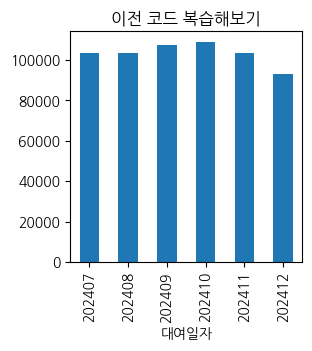

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(3,3))
temp_data.plot(kind="bar")
plt.title("이전 코드 복습해보기")
plt.show()

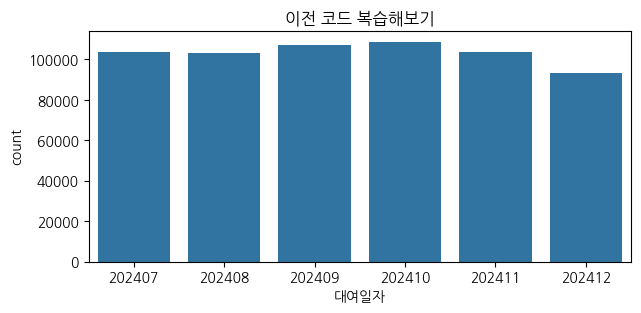

In [72]:
plt.figure(figsize=(7, 3))
sns.countplot(data=new_data, x="대여일자")
plt.title("이전 코드 복습해보기")
plt.show()

* 이 행은 대여소코드, 대여구분코드, 성별, 연령대코드별로 이용건수가 집계된 행이기 때문에 위의 시각화로는 의미를 도출하기 힘들다

### 건당 이동거리에 대한 히스토그램, 상자그림 그리기

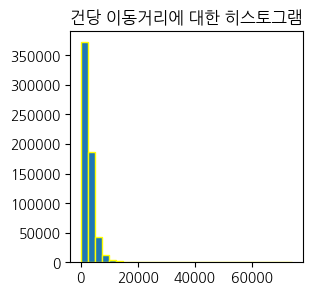

In [188]:
import matplotlib.pyplot as plt
# .hist(), .boxplot()
plt.figure(figsize=(3, 3))
plt.hist(new_data["건당 이동거리(M)"], bins = 30, edgecolor = "yellow")
plt.title("건당 이동거리에 대한 히스토그램")
plt.show()

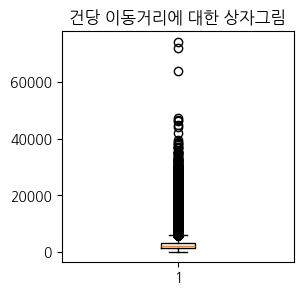

In [189]:
plt.figure(figsize=(3, 3))
plt.boxplot(x=new_data["건당 이동거리(M)"])
plt.title("건당 이동거리에 대한 상자그림")
plt.show()

### 성별이 남자인 사람의 평균 이동거리, 평균 이용시간

⭐ 고민 해볼 것
* 이동거리, 이용시간은 어떻게 집계된 데이터일까?    -> 합계
* 건당 이동거리, 건당 이용시간이 왜 필요할까?      -> 한 행이 한 집단이라고 생각하고, 이 집단의 대표값을 정함 -> mean()사용

#### a. 평균의 평균으로 계산한 값

In [94]:
## 목표 : 데이터 요약
## 성별이 남자인 데이터 출력하기 data_m
## data_m에서 평균 이동거리, 이용시간 추출한 후 .mean() 사용해보기

In [93]:
# 1번째 방법 (평균을 낸 후, 집단의 대표값을 정한 뒤 mean()사용 -> 평균의 평균 -> 2번 방법보다 더 정확하진 않음)
data_m = new_data[new_data["성별"] == "M"]
data_m[["건당 이동거리(M)", "건당 이용시간(분)"]].mean()

건당 이동거리(M)    2668.111610
건당 이용시간(분)      23.170525
dtype: float64

#### b. 정확한 계산식

In [92]:
# 2번째 방법 (이동거리나 이용시간의 합을 총 이용건수로 나눔 -> 보다 정확한 값)
# 남자 데이터의 이동거리 평균
print(data_m["이동거리(M)"].sum() / data_m["이용건수"].sum())

# 남자 데이터의 이용시간 평균
print(data_m["이용시간(분)"].sum() / data_m["이용건수"].sum())

2224.0466485714205
19.664125525743135


### 성별로 평균 이동거리, 평균 이용시간

#### a. 평균의 평균값으로 계산

In [95]:
new_data.groupby("성별")["건당 이동거리(M)"].mean()

성별
F    2684.818708
M    2668.111610
O    2756.297323
Name: 건당 이동거리(M), dtype: float64

#### b. 정확한 계산식

In [96]:
new_data.groupby("성별")["이동거리(M)"].sum()

성별
F    1.334666e+10
M    2.358969e+10
O    1.363556e+10
Name: 이동거리(M), dtype: float64

In [97]:
new_data.groupby("성별")["이용건수"].sum()

성별
F     5862823
M    10606653
O     5966899
Name: 이용건수, dtype: int64

In [98]:
new_data.groupby("성별")["이동거리(M)"].sum() / new_data.groupby("성별")["이용건수"].sum()

성별
F    2276.489991
M    2224.046649
O    2285.199998
dtype: float64

In [76]:
new_data.groupby("성별")["이동거리(M)"].agg(func=["min", "mean", "max"])

,min,mean,max
성별,,,
F,0.0,66747.306317,11543940.94
M,0.0,105159.953358,6575883.33
O,0.0,69788.506640,7194367.42


### 연령대별 이용건수

In [ ]:
new_data.groupby("연령대코드")["이용건수"].sum()

연령대코드
20대      6522094
30대      5787547
40대      3577567
50대      2482276
60대       833880
70대이상     135322
~10대     1515513
기타       1582176
Name: 이용건수, dtype: int64

In [ ]:
new_data.groupby("연령대코드")["이용건수"].agg(func=["sum"]).sort_index()
# 내가 정렬 커스텀하기

,sum
연령대코드,
20대,6522094
30대,5787547
40대,3577567
50대,2482276
60대,833880
70대이상,135322
~10대,1515513
기타,1582176


### 대여소 별 이용건수

In [101]:
new_data.groupby("대여소번호")["이용건수"].sum()

대여소번호
102     21419
103     17499
104      9754
105      5212
106     13585
        ...  
6172     2846
6173     1909
6176     2795
6177     7047
6178     1211
Name: 이용건수, Length: 2785, dtype: int64

### 연령대별 이동거리, 이용시간의 평균

In [110]:
new_data.groupby("연령대코드")[["건당 이동거리(M)", "건당 이용시간(분)"]].mean()

,건당 이동거리(M),건당 이용시간(분)
연령대코드,,
20대,2451.222047,21.016007
30대,2586.120784,22.738673
40대,2878.267933,26.427358
50대,2944.130292,26.260852
60대,2802.546744,26.851123
70대이상,2555.291328,26.713537
~10대,2446.854491,22.019562
기타,2837.790135,26.163822


## 4) 지도 시각화

```
uv add folum
```

In [192]:
new_data.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250
2,202407,102,102. 망원역 1번출구 앞,일일권,O,40대,2,265.91,2.11,9098.64,64,4549.320000,32.000000
3,202407,102,102. 망원역 1번출구 앞,일일권,O,50대,6,648.52,5.11,22048.26,149,3674.710000,24.833333
4,202407,102,102. 망원역 1번출구 앞,일일권,O,60대,1,35.37,0.31,1333.18,6,1333.180000,6.000000


In [193]:
# 공공자전거 대여소 정보
# 공공자전거 대여소 정보(api수집).csv
sub_data = pd.read_csv("data/공공자전거 대여소 정보(api수집).csv")
sub_data.head(5)

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [194]:
# RENT_NO, RENT_ID_NM, STA_LAT, STA_LONG 열만 가지고 오기
sub_data = sub_data[["RENT_NO", "RENT_ID_NM", "STA_LAT", "STA_LONG"]]
sub_data

,RENT_NO,RENT_ID_NM,STA_LAT,STA_LONG
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300
...,...,...,...,...
3165,722,722. 경서농협 버스정류장(우리은행신정동지점방향),37.521511,126.857384
3166,723,723. SBS방송국,37.529163,126.872749
3167,724,724. 계남공원 입구 주출입구 좌측,37.510597,126.857323
3168,725,725. 양강중학교앞 교차로,37.524334,126.850548


In [195]:
# [대여소번호, 대여소명, 위도, 경도]로 열 이름 바꾸기
# sub_data = temp_data2.rename(columns={"RENT_NO" : "대여소번호", "RENT_ID_NM":"대여소명", "STA_LAT":"위도", "STA_LONG":"경도"})
sub_data.columns = ["대여소번호", "대여소명", "위도", "경도"]
sub_data.head()

,대여소번호,대여소명,위도,경도
0,108,108. 서교동 사거리,37.552746,126.918617
1,503,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729,729. 서부식자재마트 건너편,37.510380,126.866798
3,731,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732,732. 신월중학교,37.539551,126.828300


In [196]:
new_data.head(2)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동거리(M),건당 이용시간(분)
0,202407,102,102. 망원역 1번출구 앞,일일권,O,20대,67,4304.28,40.87,176252.62,1895,2630.636119,28.283582
1,202407,102,102. 망원역 1번출구 앞,일일권,O,30대,64,4142.09,38.92,167774.15,1498,2621.471094,23.406250


In [197]:
# new_data에서 대여소별 이동거리(M), 이용시간(분), 이용건수의 합 구하기 summary_data
summary_data = new_data.groupby("대여소명")[["이동거리(M)", "이용시간(분)", "이용건수"]].sum()
summary_data.head()

,이동거리(M),이용시간(분),이용건수
대여소명,,,
1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1002. 해공공원(천호동),37190390.67,349509,15322
1003. 해공도서관앞,14033033.55,155349,7385
1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
1006. 롯데캐슬 115동앞,2869819.58,26311,1540


In [198]:
# summary_data 에서 인덱스 리셋하기
summary_data = summary_data.reset_index()
summary_data.head()

,대여소명,이동거리(M),이용시간(분),이용건수
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762
1,1002. 해공공원(천호동),37190390.67,349509,15322
2,1003. 해공도서관앞,14033033.55,155349,7385
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540


In [220]:
summary_data.shape

(2785, 6)

In [199]:
# 1003.해공도서관앞 대여소의 위도, 경도 찾기
sub_data.loc[sub_data["대여소명"] == "1003. 해공도서관앞", "위도"].values[0]

np.float64(37.54395676)

In [222]:
summary_data["대여소명"].tolist()[0]

'1001. 광진교 남단 사거리(천호공원 방면)'

In [202]:
# 반복문 이해하기
lat_list = []    # 위도
long_list = []   # 경도

for name in summary_data["대여소명"].tolist() :
    try :
        lat_value = sub_data.loc[sub_data["대여소명"] == name, "위도"].values[0]
        long_value = sub_data.loc[sub_data["대여소명"] == name, "경도"].values[0]
        # print(lat_value, long_value)

    except Exception as e:
        lat_value = None
        long_value = None
        # print("데이터를 찾을 수 없습니다.")

    lat_list.append(lat_value)
    long_list.append(long_value)

    # print(lat_list, long_list)

summary_data["위도"] = lat_list
summary_data["경도"] = long_list

summary_data

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
0,1001. 광진교 남단 사거리(천호공원 방면),22579951.13,212018,9762,37.541794,127.124748
1,1002. 해공공원(천호동),37190390.67,349509,15322,37.545265,127.125938
2,1003. 해공도서관앞,14033033.55,155349,7385,37.543957,127.125488
3,1004. 삼성광나루아파트 버스정류장,32114486.56,309776,10468,37.553329,127.128868
4,1006. 롯데캐슬 115동앞,2869819.58,26311,1540,37.554867,127.142799
...,...,...,...,...,...,...
2780,992.북한산입구 정류장,3876214.34,28775,993,37.658287,126.945297
2781,993.은평뉴타운 은뜨락아파트앞,3651995.73,37174,2097,37.630287,126.919563
2782,994.북한산생태공원입구(교통섬),2842205.41,24495,1639,37.610508,126.938538
2783,995.은평다목적체육관,4923604.57,44168,2544,37.631409,126.925407


In [223]:
# summary_data에서 이동거리가 많은 순으로 Top10 뽑기
# data_d_top10 = summary_data.sort_values(by=["이동거리(M)"], ascending=False)
# data_d_top10.iloc[:10,:]

data_d_top10 = summary_data.sort_values(by="이동거리(M)", ascending=False).head(10)
data_d_top10


,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1409,3511. 응봉역 1번출구,1.208717e+08,832153,21577,37.551250,127.035103


In [224]:
# summary_data에서 이용시간이 많은 순으로 Top10 뽑기
data_t_top10 = summary_data.sort_values(by="이용시간(분)", ascending=False).head(10)
data_t_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
774,207. 여의나루역 1번출구 앞,2.027993e+08,1648615,39038,37.527157,126.931900
1193,272. 당산육갑문,1.804158e+08,1322940,34325,37.535339,126.903679
2423,565. 옥수역 3번출구,1.932620e+08,1276284,29066,37.541367,127.017761
2459,583. 청계천 생태교실 앞,1.935874e+08,1235396,30419,37.567970,127.046890
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
796,2102. 봉림교 교통섬,1.380883e+08,1009331,38268,37.484085,126.926888
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217


In [225]:
# summary_data에서 이용건수가 많은 순으로 Top10 뽑기
data_c_top10 = summary_data.sort_values(by="이용건수", ascending=False).head(10)
data_c_top10

,대여소명,이동거리(M),이용시간(분),이용건수,위도,경도
1188,2715.마곡나루역 2번 출구,1.395554e+08,1222774,98439,37.566925,126.827438
1200,2728.마곡나루역 3번 출구,9.318509e+07,752838,65977,37.565804,126.828079
1829,4217. 한강공원 망원나들목,3.539830e+08,2814405,65749,37.555576,126.896889
2301,502. 자양(뚝섬한강공원)역 1번출구 앞,2.455384e+08,2074352,63557,37.531860,127.067192
178,1210. 롯데월드타워(잠실역2번출구 쪽),1.274169e+08,1198697,61994,37.513126,127.100960
1175,2701. 마곡나루역 5번출구 뒤편,6.483893e+07,529924,59768,37.565201,126.827316
124,"1153. 발산역 1번, 9번 인근 대여소",8.286086e+07,750695,55671,37.558949,126.837173
938,230. 영등포구청역 1번출구,7.260118e+07,946392,52836,37.524635,126.896217
1428,3533. 건대입구역 사거리(롯데백화점),8.230525e+07,864711,40457,37.539295,127.070786
101,1124. 발산역 6번 출구 뒤,5.854875e+07,599263,40233,37.558178,126.838455


### 지도 시각화

In [ ]:
import folium

# 지도 출력하기
center = [37.565516, 126.978025]    # 중심 위치
map = folium.Map(location=center, zoom_start=12)
map

In [229]:
for i in range(len(data_t_top10)) :
    # print(i)
    temp = data_t_top10.iloc[i]
    # print(temp)
    # print(temp["위도"], temp["경도"])
    lat, lng = temp[["위도", "경도"]]
    print(lat, lng)

37.55557632 126.89688873
37.53186035 127.06719208
37.52715683 126.93190002
37.53533936 126.90367889
37.54136658 127.01776123
37.56797028 127.04689026
37.56692505 126.82743835
37.51312637 127.10095978
37.48408508 126.92688751
37.52463531 126.89621735


### 이동거리 Top10 표시하기

In [231]:
# folium.Marker([data_d_top10["위도"], data_d_top10["경도"]]).add_to(map)
for i in range(len(data_d_top10)) :
    temp = data_d_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="red"), popup=temp.name).add_to(map)
map

### 이용시간 Top10 표시하기

In [232]:
for i in range(len(data_t_top10)) :
    temp = data_t_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="blue"), popup=temp.name).add_to(map)
map

### 이용건수 Top10 표시하기

In [233]:
for i in range(len(data_c_top10)) :
    temp = data_c_top10.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    folium.Marker(location=[lat, lng], icon=folium.Icon(color="green"), popup=temp.name).add_to(map)
map